# Import libraries and scripts
Several functions are imported from the train_model module, which are used to train the models and interact with their results. The Machine Learning algorithms used correspond to multiple regression, random forests, support vector machines and neural networks, while the functions are responsible for training the model using cross validation, graphing the learning curve, graphing the most important characteristics (only to the first 2 algorithms) and save all the results. This notebook is essential due to it is the final part of the project, where the data is finally used to train different models and, by comparing their results, the most appropriate one can be chosen to meet the desired objectives.

In [9]:
import sys
sys.path.append(r'C:\Users\di_estebannn\Desktop\universidad\austria\applied_machine_and_deep_learning\project\src\scripts')
from preprocess_data import separate_and_clean_data
from train_model import train_model
from train_model import learning_curve_model
from train_model import feature_importance
from train_model import save_data

import os
import pandas as pd
import numpy as np
import joblib

# Import data
Data is loaded from CSV files corresponding to the training, testing and validation data sets. Likewise, the general_path is initialized to have direct access to the project directory, as well as the paths for figures, models and results will allow direct access to the folder in which the different created graphs, models and table of results will be saved.

In [10]:
general_path = "C:/Users/di_estebannn/Desktop/universidad/austria/applied_machine_and_deep_learning/project"
path_for_figures = os.path.join(general_path, 'results', 'figures')
path_for_models = os.path.join(general_path, 'results', 'models')
path_for_results = os.path.join(general_path, 'results', 'tables')

df_training_data = pd.read_csv(general_path + '/data/processed/processed_training_data.csv')
df_testing_data = pd.read_csv(general_path + '/data/processed/processed_testing_data.csv')
df_validation_data = pd.read_csv(general_path + '/data/processed/processed_validation_data.csv')

X_train, y_train = separate_and_clean_data("Training set", df_training_data, True)
X_test, y_test = separate_and_clean_data("Testing set", df_testing_data, True)
X_val, y_val = separate_and_clean_data("Validation set", df_validation_data, True)

Sizes of the Training set: X = (7428, 21), y = (7428,).

Sizes of the Testing set: X = (1530, 21), y = (1530,).

Sizes of the Validation set: X = (1099, 21), y = (1099,).



## Table to save model performance results
Creates an empty DataFrame (results_df) with columns for various metrics and information related to model evaluation. Later, rows will be append to it as it is going through different models and collect their evaluation results.

In [11]:
results_df = pd.DataFrame(columns=['Model', 'Mean', 'Standard deviation', 'MSE on Testing set', 'MSE on Validation set', 'Training duration', 'Parameters'])

# Model Architecture
## Multiple Regression
It is a fundamental algorithm used for predicting a continuous target variable based on linear relationships with input features. It assumes a linear connection between the features and the output. This model is suitable for cases where the relationship between variables can be adequately represented by a straight line.

The results corresponding to the Multiple Regression are:

BEST PARAMETERS SELECTED WITH THE GridSearch: {}.

MEAN AND STANDARD DEVIATION OF THE RESULTS IN THE CROSS VALIDATION OF THE BEST MODEL:
-0.006 and (+/-0.001).

Mean Squared Error on Test dataset (df_testing_data): 0.006287932364769719.

Mean Squared Error on Validation dataset (df_validation_data): 0.006485017062016511.

All results:
Mean = -0.006 and Standard deviation = +/-0.001 for {}.
Best parameters found:
 {}
Mean Squared Error on Test dataset (df_testing_data): 0.006287932364769719
Mean Squared Error on Validation dataset (df_validation_data): 0.006485017062016511


['C:/Users/di_estebannn/Desktop/universidad/austria/applied_machine_and_deep_learning/project\\results\\models\\multiple_regression.pkl']

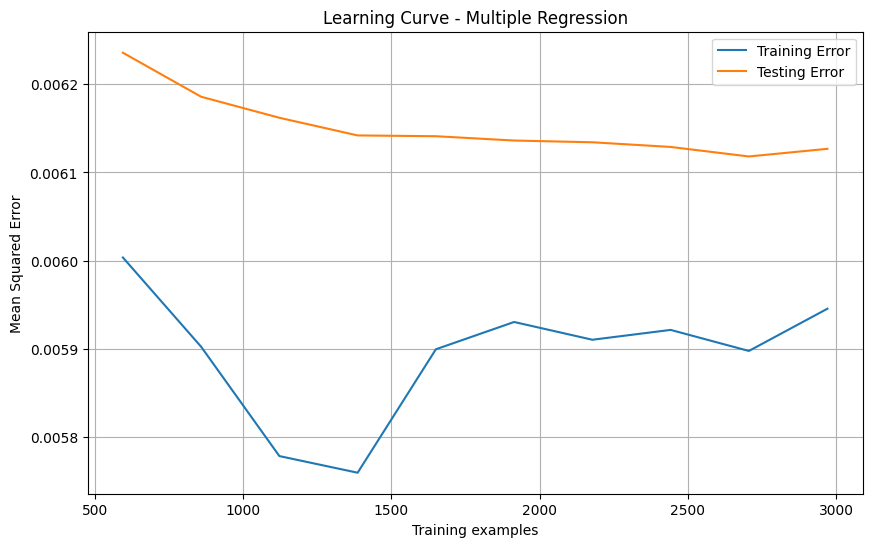

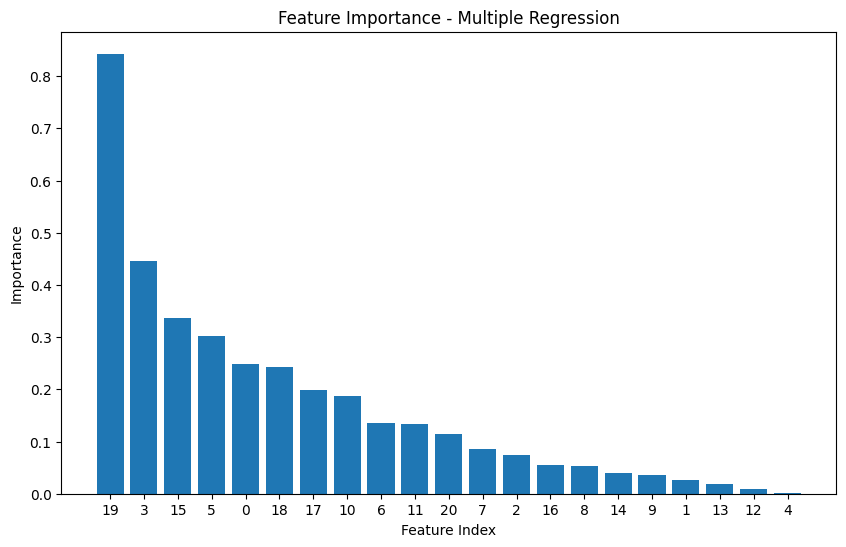

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_name = 'Multiple Regression'

param_grid = {}

best_model, results_df = train_model(model_name, model, param_grid, X_train, y_train, X_test, y_test, X_val, y_val, results_df)

figure_name = 'learning_curve_multiple_regression.png'
learning_curve_model(model, X_train, y_train, model_name, path_for_figures, figure_name)

figure_name = 'feature_importance_multiple_regression.png'
feature_importance_lr = np.abs(best_model.coef_)
feature_importance(X_train, feature_importance_lr, model_name, path_for_figures, figure_name)

joblib.dump(best_model, os.path.join(path_for_models, 'multiple_regression.pkl'))

## Random Forest (Regressor)
It is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputs the average prediction of the individual trees for regression tasks. This algorithm is known for its robustness, ability to handle complex relationships and resistance to overfitting.

The results corresponding to the Random Forest are:

BEST PARAMETERS SELECTED WITH THE GridSearch: {'max_depth': 50, 'n_estimators': 500}.

MEAN AND STANDARD DEVIATION OF THE RESULTS IN THE CROSS VALIDATION OF THE BEST MODEL:
-0.004 and (+/-0.001).

Mean Squared Error on Test dataset (df_testing_data): 0.004286808596908077.

Mean Squared Error on Validation dataset (df_validation_data): 0.004519706926560613.

All results:
Mean = -0.004 and Standard deviation = +/-0.001 for {'max_depth': None, 'n_estimators': 50}.
Mean = -0.004 and Standard deviation = +/-0.001 for {'max_depth': None, 'n_estimators': 125}.
Mean = -0.004 and Standard deviation = +/-0.001 for {'max_depth': None, 'n_estimators': 250}.
Mean = -0.004 and Standard deviation = +/-0.001 for {'max_depth': None, 'n_estimators': 500}.
Mean = -0.005 and Standard deviation = +/-0.001 for {'max_depth': 10, 'n_estimators': 50}.
Mean = -0.005 and Standard deviation = +/-0.001 for {'max_depth': 10, 'n_estimators': 125}.
Mean = -0.005 and Standard deviation = +/-0.001 for {'max_depth': 10, 'n_estimators': 250}.
Mean = -0.005 and Standard deviation = +/-0.001 for {'max_depth': 10, 'n_estimators': 500}.
Mean = -0.004 and Standard deviation = +/-0.001 for {'max_depth': 25, 'n_estimators': 50}.
Mean = -0.004 and Standard deviation = +/-0.001 for {'max_depth': 25, 'n_estimators': 125}.
Mean = -0.004 and Standard deviation = +/-0.001 for {'max_dept

['C:/Users/di_estebannn/Desktop/universidad/austria/applied_machine_and_deep_learning/project\\results\\models\\random_forest_regressor.pkl']

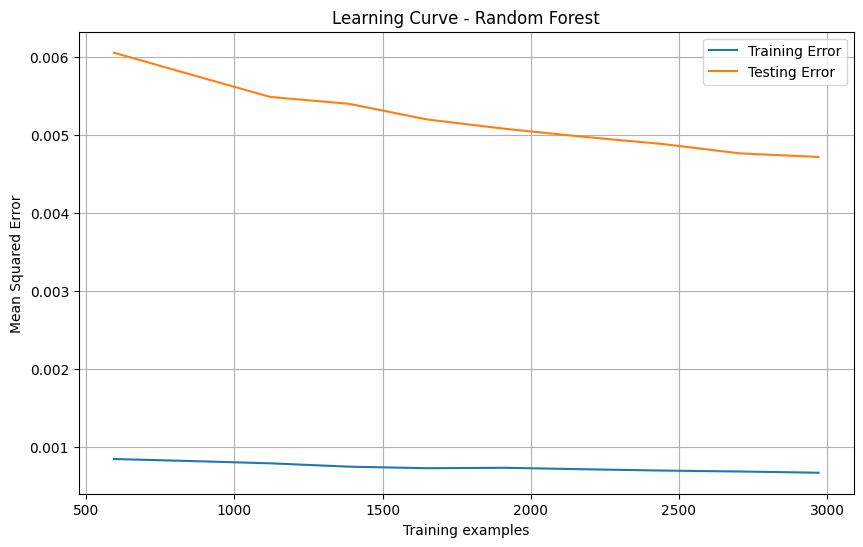

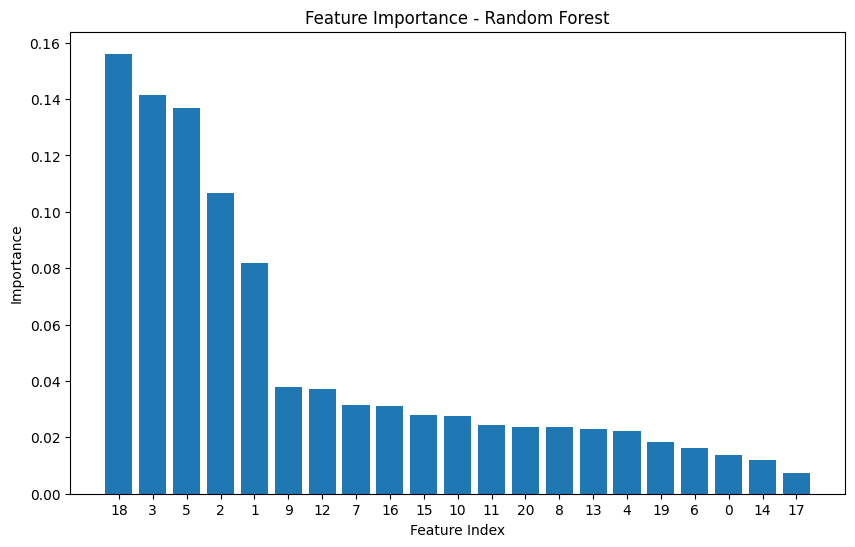

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model_name = 'Random Forest'

param_grid = {'n_estimators': [50, 125, 250, 500], 'max_depth': [None, 10, 25, 50]}

best_model, results_df = train_model(model_name, model, param_grid, X_train, y_train, X_test, y_test, X_val, y_val, results_df)

figure_name = 'learning_curve_random_forest.png'
learning_curve_model(model, X_train, y_train, model_name, path_for_figures, figure_name)

figure_name = 'feature_importance_random_forest.png'
feature_importance_rf = best_model.feature_importances_
feature_importance(X_train, feature_importance_rf, model_name, path_for_figures, figure_name)

joblib.dump(best_model, os.path.join(path_for_models, 'random_forest_regressor.pkl'))

## Support Vector Machine (Regressor)
It is a versatile algorithm capable of performing both classification and regression tasks. In regression, SVM aims to find a hyperplane that best represents the data while minimizing errors. It is effective in capturing complex relationships and is less sensitive to outliers compared to some other models.

The results corresponding to the Multiple Regression are:

BEST PARAMETERS SELECTED WITH THE GridSearch: {'C': 5.0, 'gamma': 'scale', 'kernel': 'rbf'}.

MEAN AND STANDARD DEVIATION OF THE RESULTS IN THE CROSS VALIDATION OF THE BEST MODEL:
-0.005 and (+/-0.001).

Mean Squared Error on Test dataset (df_testing_data): 0.0052484163368553645.

Mean Squared Error on Validation dataset (df_validation_data): 0.005097593802365422.

All results:
Mean = -0.006 and Standard deviation = +/-0.001 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}.
Mean = -0.005 and Standard deviation = +/-0.001 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}.
Mean = -0.263 and Standard deviation = +/-0.035 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}.
Mean = -0.005 and Standard deviation = +/-0.001 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}.
Mean = -0.006 and Standard deviation = +/-0.001 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}.
Mean = -0.008 and Standard deviation = +/-0.001 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}.
Mean = -0.007 and Standard deviation = +/-0.001 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}.
Mean = -0.007 and Standard deviation = +/-0.001 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}.
Mean = -0.006 and Standard deviation = +/-0.001 for {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}.
Mean = -0.005 and Standard deviation = +/-0.001 for {'C': 1.0, 'gamma': 'scale', 

['C:/Users/di_estebannn/Desktop/universidad/austria/applied_machine_and_deep_learning/project\\results\\models\\support_vector_regressor.pkl']

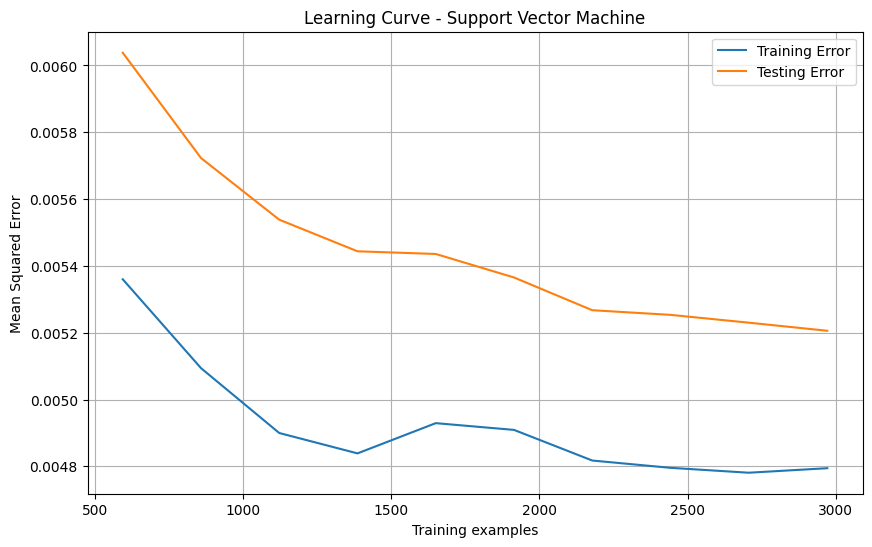

In [17]:
from sklearn.svm import SVR

model = SVR()
model_name = 'Support Vector Machine'

param_grid = {
    'C': [0.1, 1.0, 5.0, 10.0, 100.0],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'gamma': ['scale', 'auto']
}

best_model, results_df = train_model(model_name, model, param_grid, X_train, y_train, X_test, y_test, X_val, y_val, results_df)

figure_name = 'learning_curve_svm.png'
learning_curve_model(model, X_train, y_train, model_name, path_for_figures, figure_name)

joblib.dump(best_model, os.path.join(path_for_models, 'support_vector_regressor.pkl'))

## Neural Network (Regressor)
Inspired by the structure of the human brain, consist of interconnected nodes arranged in layers. In regression tasks, neural networks can learn complex patterns and relationships in the data. They are particularly effective for capturing nonlinear mappings but may require careful tuning of hyperparameters.

The results corresponding to the Multiple Regression are:

BEST PARAMETERS SELECTED WITH THE GridSearch: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 250, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam', 'tol': 0.0001}.

MEAN AND STANDARD DEVIATION OF THE RESULTS IN THE CROSS VALIDATION OF THE BEST MODEL:
-0.006 and (+/-0.001).

Number of iterations for convergence: 21.

Mean Squared Error on Test dataset (df_testing_data): 0.006238386845133555.

Mean Squared Error on Validation dataset (df_validation_data): 0.006425751740710489.

All results:
Mean = -0.008 and Standard deviation = +/-0.001 for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam', 'tol': 0.0001}.
Mean = -0.009 and Standard deviation = +/-0.001 for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam', 'tol': 0.1}.
Mean = -0.007 and Standard deviation = +/-0.002 for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 500, 'solver': 'adam', 'tol': 0.0001}.
Mean = -0.008 and Standard deviation = +/-0.002 for {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 500, 'solver': 'adam', 'tol': 0.1}.
Mean = -0.008 and Standard deviation = +/-0.001 for {'activation': 'tanh', 'alpha': 1e-05, 'h

['C:/Users/di_estebannn/Desktop/universidad/austria/applied_machine_and_deep_learning/project\\results\\models\\neural_network_regressor.pkl']

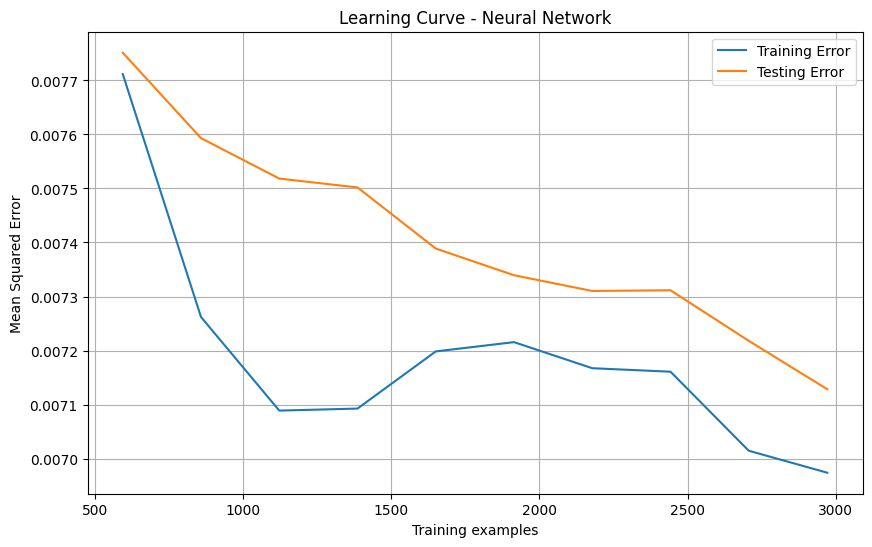

In [15]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=42)
model_name = 'Neural Network'

param_grid = {
    'max_iter': [500],
    'hidden_layer_sizes': [10, 50, 100, 250, 500],
    'activation': ['tanh', 'relu', 'identity', 'logistic'],
    'solver': ['adam'], #'sgd'
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'tol': [1e-4, 1e-1],
    'learning_rate_init': [1e-3, 1e-1],
    'learning_rate': ['constant', 'adaptive']
}


best_model, results_df = train_model(model_name, model, param_grid, X_train, y_train, X_test, y_test, X_val, y_val, results_df, True)

figure_name = 'learning_curve_nn.png'
learning_curve_model(model, X_train, y_train, model_name, path_for_figures, figure_name)

joblib.dump(best_model, os.path.join(path_for_models, 'neural_network_regressor.pkl'))

### Save data results of models

In [18]:
save_data(results_df, path_for_results, 'model_performance_results.csv')

The model_performance_results.csv has been saved in C:/Users/di_estebannn/Desktop/universidad/austria/applied_machine_and_deep_learning/project\results\tables.

